In [229]:
import pandas as pd
import numpy as np
# Read in our weather dataset for Fort Worth, with date as the index.
weather = pd.read_csv('/Users/mattbarnes/Python_projects/Weather_prediction/Fort_Worth_weather_data.csv', index_col = 'DATE')
print(weather.head())

                STATION                          NAME   ACMH   ACSH  AWND  \
DATE                                                                        
1975-01-01  USW00003927  DAL FTW WSCMO AIRPORT, TX US  100.0  100.0   NaN   
1975-01-02  USW00003927  DAL FTW WSCMO AIRPORT, TX US   70.0  100.0   NaN   
1975-01-03  USW00003927  DAL FTW WSCMO AIRPORT, TX US   20.0   30.0   NaN   
1975-01-04  USW00003927  DAL FTW WSCMO AIRPORT, TX US    0.0    0.0   NaN   
1975-01-05  USW00003927  DAL FTW WSCMO AIRPORT, TX US   10.0   10.0   NaN   

            FMTM    PGTM  PRCP  PSUN  SNOW  ...  WT13  WT14  WT15  WT16  WT17  \
DATE                                        ...                                 
1975-01-01   NaN   600.0  0.04   NaN   0.0  ...   NaN   NaN   NaN   1.0   NaN   
1975-01-02   NaN     6.0  0.42   NaN   0.0  ...   NaN   NaN   NaN   1.0   NaN   
1975-01-03   NaN   906.0  0.00   NaN   0.0  ...   NaN   NaN   NaN   NaN   NaN   
1975-01-04   NaN  1230.0  0.00   NaN   0.0  ...   NaN  

In [230]:
# Calculate percentage of null values in each column.
print(f'(rows, columns): {weather.shape}')
percent_null = pd.isnull(weather).sum()/weather.shape[0] #check percentage of null values
print(percent_null)

(rows, columns): (18159, 45)
STATION    0.000000
NAME       0.000000
ACMH       0.579327
ACSH       0.579327
AWND       0.181288
FMTM       0.441049
PGTM       0.310810
PRCP       0.000055
PSUN       0.899444
SNOW       0.000496
SNWD       0.187510
TAVG       0.622061
TMAX       0.000055
TMIN       0.000055
TSUN       0.590451
WDF1       0.579602
WDF2       0.421003
WDF5       0.422766
WDFG       0.584228
WESD       0.999009
WSF1       0.579547
WSF2       0.421003
WSF5       0.422766
WSFG       0.584063
WT01       0.791894
WT02       0.975274
WT03       0.867724
WT04       0.993557
WT05       0.997136
WT06       0.993392
WT07       0.998293
WT08       0.890578
WT09       0.999670
WT10       0.999945
WT11       0.997522
WT13       0.914423
WT14       0.968996
WT15       0.997962
WT16       0.780770
WT17       0.998073
WT18       0.990253
WT19       0.999504
WT21       0.999780
WT22       0.999670
WV03       0.999890
dtype: float64


In [231]:
# Keep columns with 95% non-null values
valid_features = weather.columns[percent_null <= 0.05] 
weather = weather[valid_features].copy()

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'TMAX', 'TMIN'], dtype='object')


In [232]:
weather.columns = weather.columns.str.lower() # Improve column name format
percent_null = pd.isnull(weather).sum()/weather.shape[0]
print(percent_null) # Rechecking percent of null values

In [303]:
# Drop all null values from dataset
weather = weather.dropna()
percent_null = pd.isnull(weather).sum()/weather.shape[0]
print(weather.shape)
print(percent_null)  # Check how much data has been lost and if all null values have been removed

(18136, 16)
station            0.0
name               0.0
prcp               0.0
snow               0.0
tmax               0.0
tmin               0.0
target             0.0
rolling_3_tmax     0.0
tmax_pct_change    0.0
rolling_3_tmin     0.0
tmin_pct_change    0.0
rolling_3_prcp     0.0
prcp_pct_change    0.0
rolling_14_tmax    0.0
rolling_14_tmin    0.0
rolling_14_prcp    0.0
dtype: float64


In [234]:
# Check column data types
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
tmax       float64
tmin       float64
dtype: object

In [235]:
# Check index data type
weather.index

Index(['1975-01-01', '1975-01-02', '1975-01-03', '1975-01-04', '1975-01-05',
       '1975-01-06', '1975-01-07', '1975-01-08', '1975-01-09', '1975-01-10',
       ...
       '2024-09-08', '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12',
       '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17'],
      dtype='object', name='DATE', length=18150)

In [236]:
# Change index data type from object to datetime
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1975-01-01', '1975-01-02', '1975-01-03', '1975-01-04',
               '1975-01-05', '1975-01-06', '1975-01-07', '1975-01-08',
               '1975-01-09', '1975-01-10',
               ...
               '2024-09-08', '2024-09-09', '2024-09-10', '2024-09-11',
               '2024-09-12', '2024-09-13', '2024-09-14', '2024-09-15',
               '2024-09-16', '2024-09-17'],
              dtype='datetime64[ns]', name='DATE', length=18150, freq=None)

In [237]:
weather.index.year.value_counts().sort_index() # Check for gaps in data

DATE
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    362
1997    364
1998    365
1999    365
2000    364
2001    364
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    261
Name: count, dtype: int64

In [238]:
# Create a target column of tomorrow's tmax.
weather['target'] = weather.shift(-1)['tmax']
weather = weather.ffill() # fill the last row's NaN value
weather

,station,name,prcp,snow,tmax,tmin,target
DATE,,,,,,,
1975-01-01,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.04,0.0,45.0,40.0,47.0
1975-01-02,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.42,0.0,47.0,40.0,50.0
1975-01-03,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,50.0,37.0,56.0
1975-01-04,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,56.0,29.0,60.0
1975-01-05,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,60.0,37.0,62.0
...,...,...,...,...,...,...,...
2024-09-13,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,92.0,70.0,93.0
2024-09-14,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,93.0,75.0,92.0
2024-09-15,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,92.0,74.0,91.0


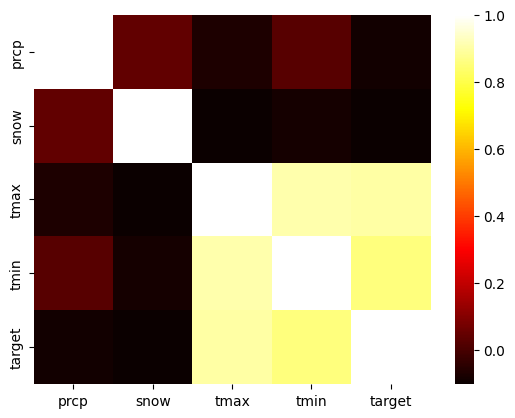

In [239]:
# Inspect covariance of features
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(weather.corr(numeric_only = True), cmap = 'hot')
plt.show()
plt.close()

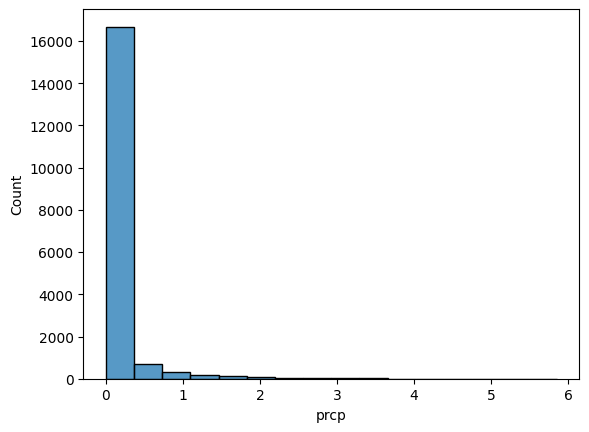

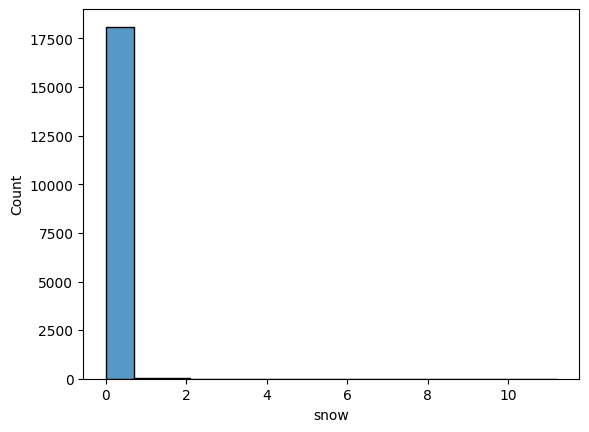

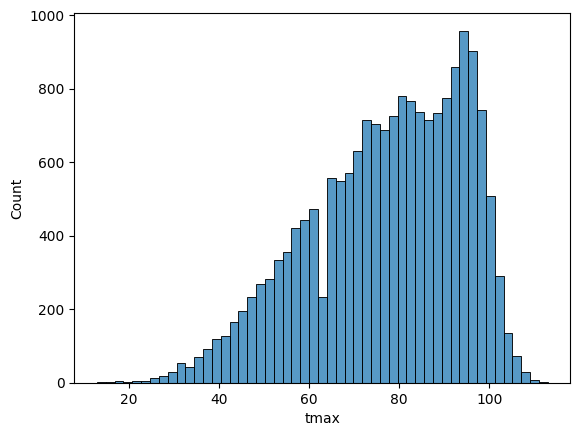

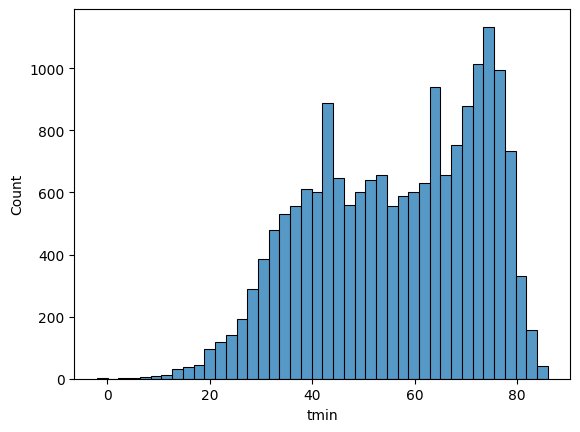

In [240]:
# Inspect feature distribution
for ft in weather.columns[~weather.columns.isin(['name', 'station', 'target'])]:
    
    sns.histplot(weather, x = ft)
    plt.show()
    plt.close()

In [241]:
# We have covariance between features, and we dont want to drop any features so we will use Ridge regression
# Train ML model
from sklearn.linear_model import Ridge
model = Ridge(alpha = 8) 

In [242]:
# Create predictors and targets
predictors = weather.columns[~weather.columns.isin(['target', 'name', 'station'])]
weather[predictors]


,prcp,snow,tmax,tmin
DATE,,,,
1975-01-01,0.04,0.0,45.0,40.0
1975-01-02,0.42,0.0,47.0,40.0
1975-01-03,0.00,0.0,50.0,37.0
1975-01-04,0.00,0.0,56.0,29.0
1975-01-05,0.00,0.0,60.0,37.0
...,...,...,...,...
2024-09-13,0.00,0.0,92.0,70.0
2024-09-14,0.00,0.0,93.0,75.0
2024-09-15,0.00,0.0,92.0,74.0


In [243]:
# Cross validation for time-series data
def walk_forward_validation(weather, model, predictors, start = 3650, step = 90):
    predictions = []
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        model.fit(train[predictors], train['target'])
        preds = pd.Series(model.predict(test[predictors]), index = test.index)
        combined = pd.concat([test['target'], preds], axis = 1)
        combined.columns = ['actual', 'predicted']
        combined['absolute_error'] = (combined.actual - combined.predicted).abs()
        predictions.append(combined)
    return pd.concat(predictions)   

In [244]:
# Make predictions
predictions = walk_forward_validation(weather, model, predictors)

In [245]:
# Get MAE of predictions
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions.actual, predictions.predicted)

5.313791419010984

In [246]:
# Add predictors to improve accuracy
def percent_change(old, new):
    return (new-old)/old

def create_rolling(weather, days, feature):
    rolling_feature_name = f'rolling_{days}_{feature}'
    weather[rolling_feature_name] = weather[feature].rolling(days).mean()
    weather[f'{feature}_pct_change'] = percent_change(weather[rolling_feature_name], weather[feature])
    return weather
days = [3, 14]
for day in days:
    for feature in ['tmax', 'tmin', 'prcp']:
        weather = create_rolling(weather, day, feature)
weather.head(15)

,station,name,prcp,snow,tmax,tmin,target,rolling_3_tmax,tmax_pct_change,rolling_3_tmin,tmin_pct_change,rolling_3_prcp,prcp_pct_change,rolling_14_tmax,rolling_14_tmin,rolling_14_prcp
DATE,,,,,,,,,,,,,,,,
1975-01-01,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.04,0.0,45.0,40.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-02,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.42,0.0,47.0,40.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-03,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,50.0,37.0,56.0,47.333333,NaN,39.000000,NaN,0.153333,NaN,NaN,NaN,NaN
1975-01-04,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,56.0,29.0,60.0,51.000000,NaN,35.333333,NaN,0.140000,NaN,NaN,NaN,NaN
1975-01-05,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,60.0,37.0,62.0,55.333333,NaN,34.333333,NaN,0.000000,NaN,NaN,NaN,NaN
1975-01-06,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,62.0,34.0,74.0,59.333333,NaN,33.333333,NaN,0.000000,NaN,NaN,NaN,NaN
1975-01-07,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,74.0,45.0,62.0,65.333333,NaN,38.666667,NaN,0.000000,NaN,NaN,NaN,NaN
1975-01-08,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,62.0,46.0,71.0,66.000000,NaN,41.666667,NaN,0.000000,NaN,NaN,NaN,NaN
1975-01-09,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.20,0.0,71.0,45.0,57.0,69.000000,NaN,45.333333,NaN,0.066667,NaN,NaN,NaN,NaN


In [247]:
# Remove new null values
weather = weather.iloc[14:]
weather.head()
weather = weather.fillna(0)
weather.head(20)

,station,name,prcp,snow,tmax,tmin,target,rolling_3_tmax,tmax_pct_change,rolling_3_tmin,tmin_pct_change,rolling_3_prcp,prcp_pct_change,rolling_14_tmax,rolling_14_tmin,rolling_14_prcp
DATE,,,,,,,,,,,,,,,,
1975-01-15,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,63.0,31.0,54.0,56.333333,0.120712,25.666667,-0.105155,0.000000,-1.000000,56.214286,34.642857,0.045714
1975-01-16,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,54.0,36.0,49.0,58.666667,-0.047859,32.000000,0.047817,0.000000,-1.000000,56.714286,34.357143,0.015714
1975-01-17,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.03,0.0,49.0,44.0,61.0,55.333333,-0.134931,37.000000,0.262295,0.010000,0.680000,56.642857,34.857143,0.017857
1975-01-18,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.01,0.0,61.0,45.0,58.0,54.666667,0.070175,41.666667,0.250000,0.013333,-0.461538,57.000000,36.000000,0.018571
1975-01-19,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,58.0,36.0,56.0,56.000000,0.020101,41.666667,0.001988,0.013333,-1.000000,56.857143,35.928571,0.018571
1975-01-20,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,56.0,25.0,62.0,58.333333,-0.007595,35.333333,-0.291498,0.003333,-1.000000,56.428571,35.285714,0.018571
1975-01-21,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,62.0,39.0,46.0,58.666667,0.115681,33.333333,0.118852,0.000000,-1.000000,55.571429,34.857143,0.018571
1975-01-22,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,46.0,38.0,60.0,54.666667,-0.154856,34.000000,0.108333,0.000000,-1.000000,54.428571,34.285714,0.018571
1975-01-23,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.00,0.0,60.0,39.0,65.0,56.000000,0.118509,38.666667,0.151899,0.000000,-1.000000,53.642857,33.857143,0.004286


In [248]:
# Update predictors to include new features
predictors = weather.columns[~weather.columns.isin(['target', 'name', 'station'])]
predictions = walk_forward_validation(weather, model, predictors)

In [249]:
# MAE with new features
mean_absolute_error(predictions.actual, predictions.predicted)

5.046130802770731

In [250]:
# Tune hyperparameter alpha
alpha_array = range(1,50)
alpha_predictions = {}
for alpha in alpha_array:
    model = Ridge(alpha = alpha)
    preds = walk_forward_validation(weather, model, predictors)
    score = mean_absolute_error(preds.actual, preds.predicted)
    alpha_predictions[score] = alpha
print(alpha_predictions)


{5.047052246943854: 1, 5.046596442062996: 2, 5.046385791502551: 3, 5.046292740046829: 4, 5.046231017131491: 5, 5.046188236783797: 6, 5.046155377522863: 7, 5.046130802770731: 8, 5.0461165608986605: 9, 5.046106078437588: 10, 5.046098502479194: 11, 5.046090935753097: 12, 5.046081462616552: 13, 5.046071020891275: 14, 5.04605983216101: 15, 5.046048455141814: 16, 5.046040017780431: 17, 5.046031769168063: 18, 5.0460236309436235: 19, 5.046014485615971: 20, 5.046005048862756: 21, 5.045994928116998: 22, 5.045985829332622: 23, 5.045977770207562: 24, 5.045969955730726: 25, 5.045961898488812: 26, 5.04595324374892: 27, 5.045945069463144: 28, 5.045937361680375: 29, 5.045930456007999: 30, 5.045923190810291: 31, 5.045916259884344: 32, 5.045910128373947: 33, 5.0459043777202055: 34, 5.045898561349011: 35, 5.045892511029717: 36, 5.0458862230644215: 37, 5.045879945846983: 38, 5.045873869283773: 39, 5.0458684281929: 40, 5.045862912229276: 41, 5.045857770038792: 42, 5.045852902707823: 43, 5.045848774196157: 

In [251]:
# Find optimal alpha
alpha_predictions[min(alpha_predictions)]

49

In [252]:
# Try Random Forest Regressor model to see if more accurate
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 50, max_depth = 10, random_state = 100)
rfr_predictions = walk_forward_validation(weather, rfr, predictors) 
mean_absolute_error(rfr_predictions.actual, rfr_predictions.predicted) # Random Forest regressor has lower MAE

5.001033730516073

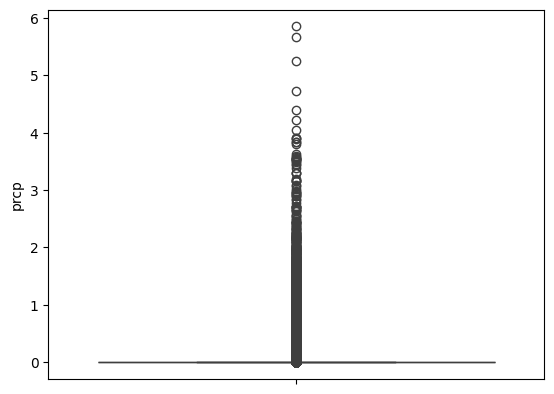

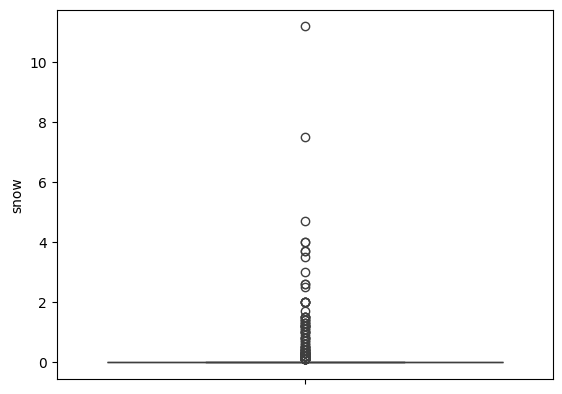

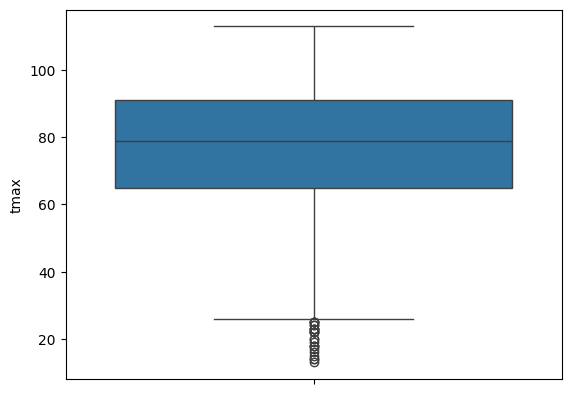

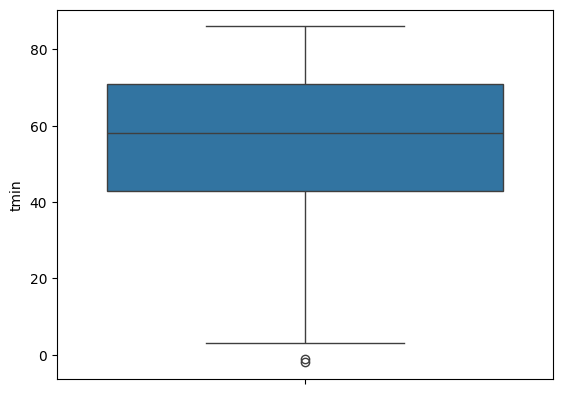

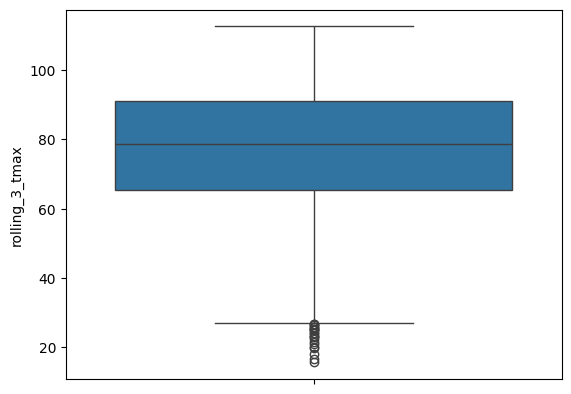

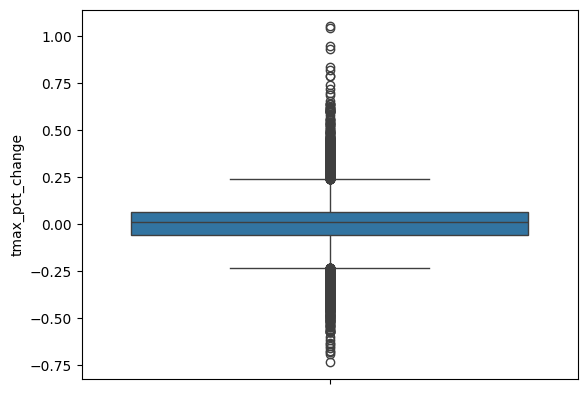

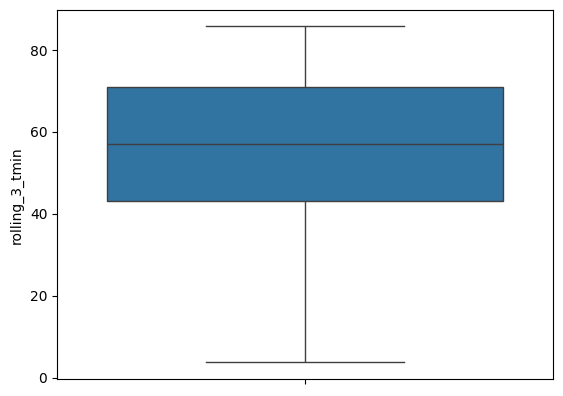

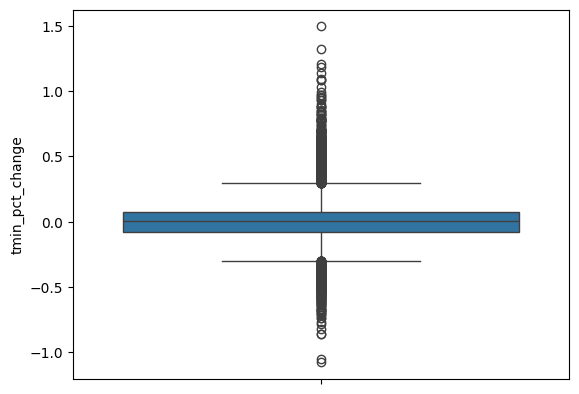

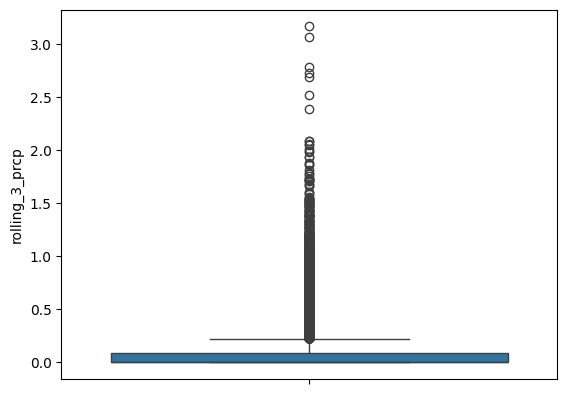

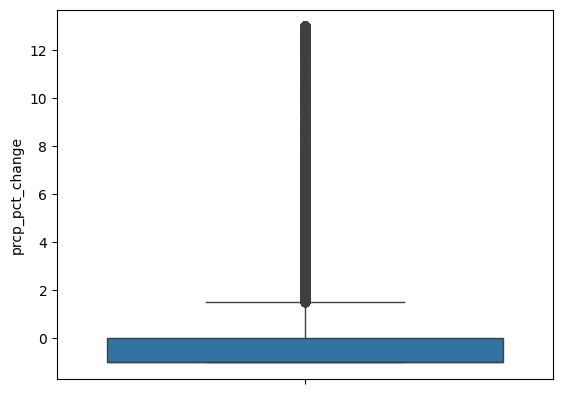

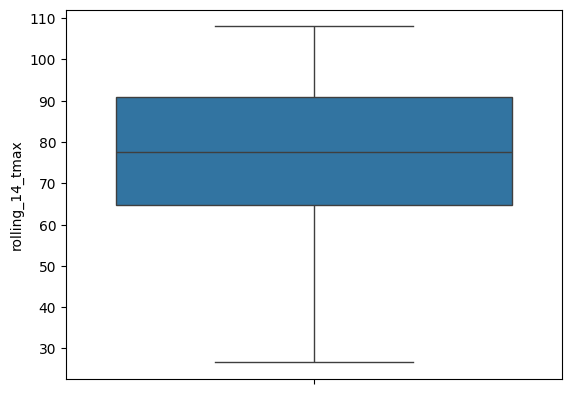

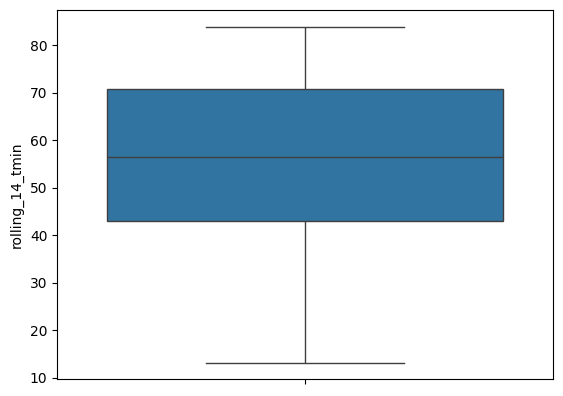

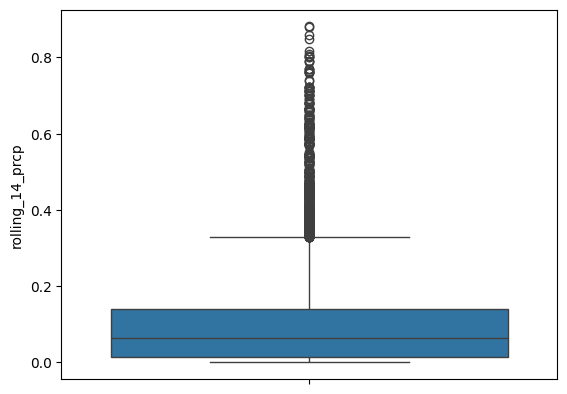

<Figure size 640x480 with 0 Axes>

In [253]:
# Inspect outliers
for col in predictors:
    sns.boxplot(weather[col])
    plt.show()
    plt.clf()

In [254]:
# Try dropping snow and prcp columns to improve accuracy
weather2 = weather.copy()
weather2 = weather2.drop(columns = ['snow', 'prcp'])
new_predictors = weather.columns[~weather.columns.isin(['target', 'name', 'station', 'snow', 'prcp'])]
rfr_predictions = walk_forward_validation(weather2, rfr, new_predictors)
mean_absolute_error(rfr_predictions.actual, rfr_predictions.predicted)
# MAE gets worse

5.021110170660645

In [308]:
no_outliers = weather.reset_index() # New DataFrame with numeric index

In [309]:
# Identify and drop outliers from dataset 
from scipy import stats
predictors = no_outliers.columns[~no_outliers.columns.isin(['target', 'name', 'station', 'DATE'])]
outlier_indices = []
for col in predictors:
    z_score = np.abs(stats.zscore(no_outliers[col]))
    for score in z_score:
        if score >= 3:
            outlier_indices.append(list(z_score).index(score))
        else:
            pass
for i in outlier_indices:
    for _ in outlier_indices:
        if i == _:
            outlier_indices.remove(i)
            
print(len(outlier_indices)) #Check how much data we lose
print(len(weather))
print(833/18136) # 4.6% of data identified as outliers

no_outliers = no_outliers.drop(outlier_indices)

# Test new dataset 
rfr_predictions = walk_forward_validation(no_outliers, rfr, predictors)
mae = mean_absolute_error(rfr_predictions.actual, rfr_predictions.predicted)


833
18136
0.04593074547860609


In [311]:
mean_temp = no_outliers['target'].mean()
print(mae)
mae/mean_temp # Gives MAE as a percentage of the mean target (temperature)
# MAE has improved after removing outliers

4.946130368036846


0.06380597255722678

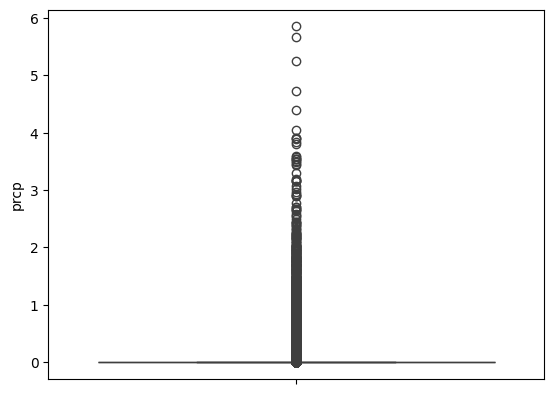

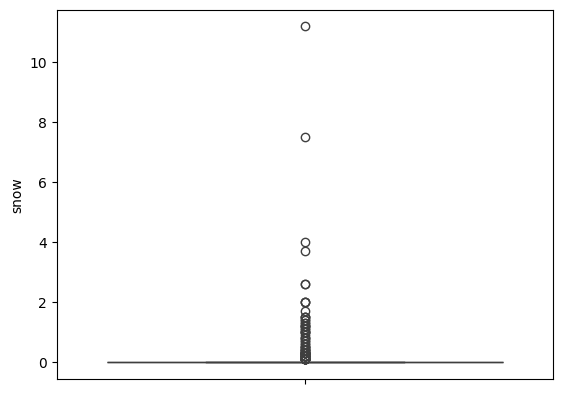

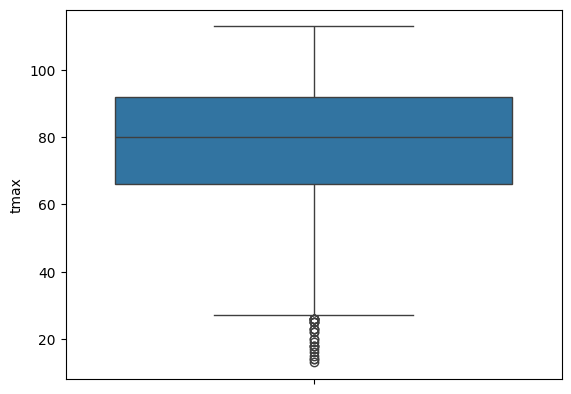

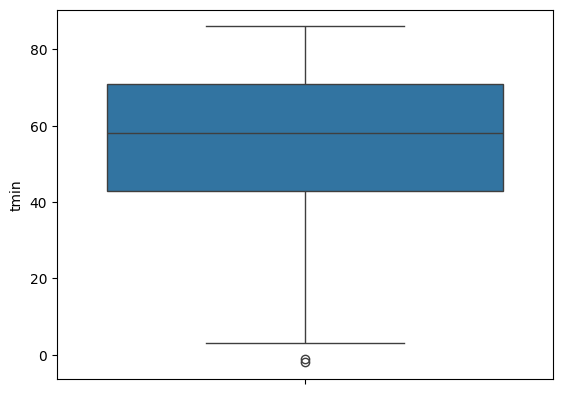

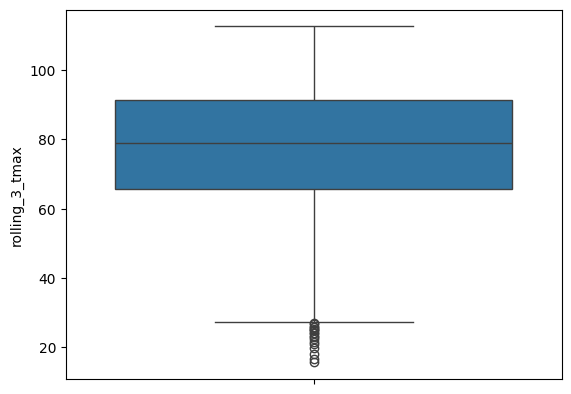

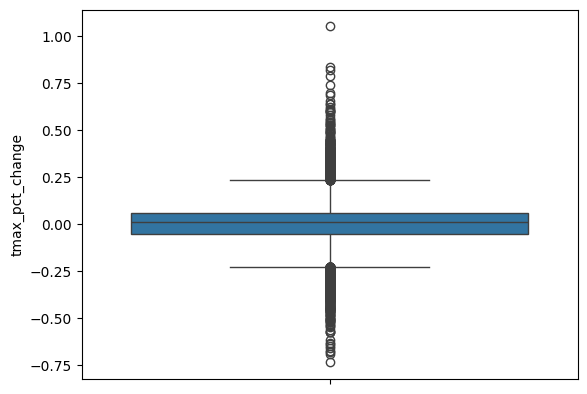

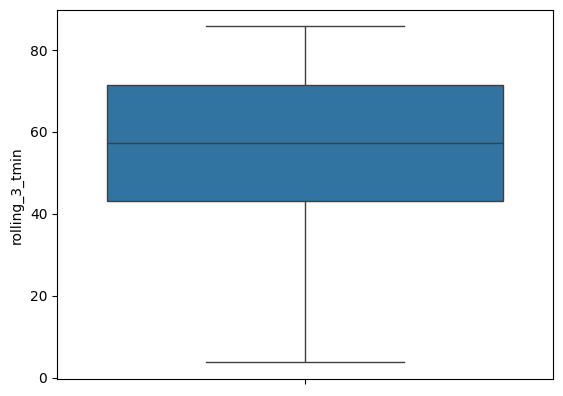

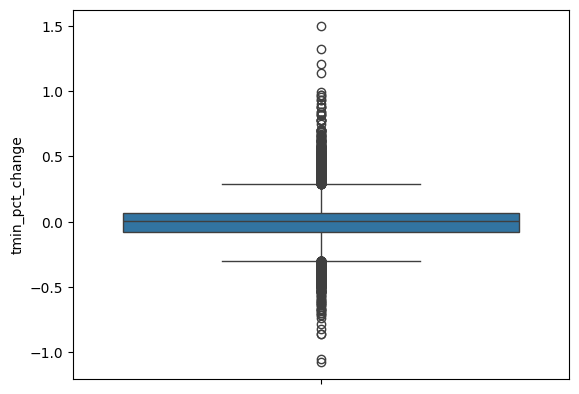

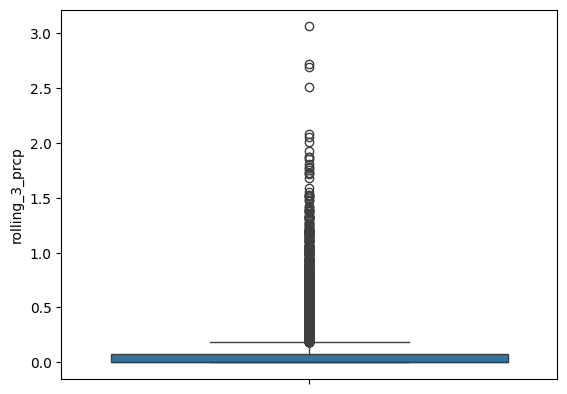

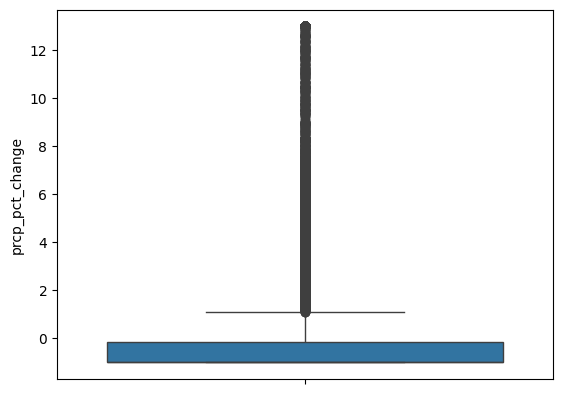

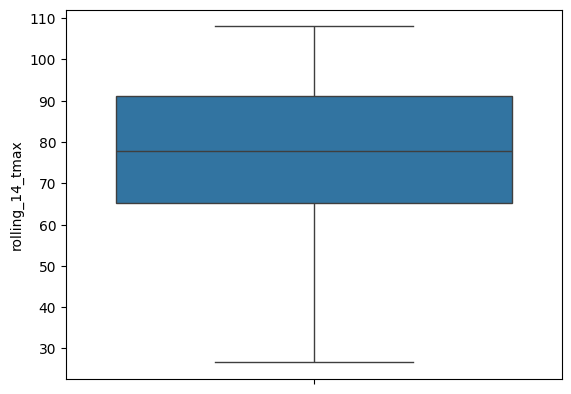

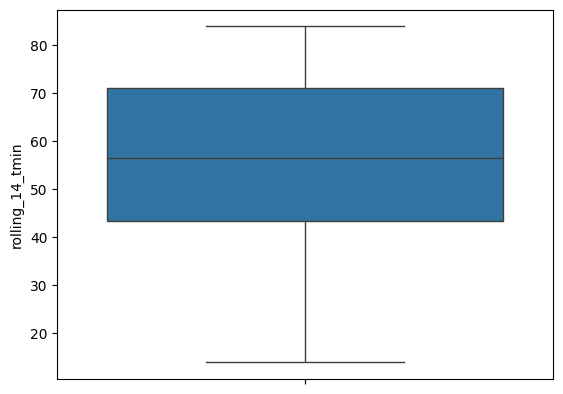

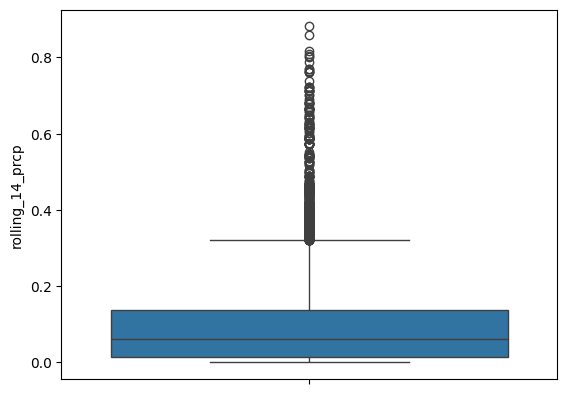

<Figure size 640x480 with 0 Axes>

In [287]:
# Inspect outliers again
for col in predictors:
    sns.boxplot(no_outliers[col])
    plt.show()
    plt.clf()

In [297]:
# Tune hyperparameters of Random Forest Regressor using Grid Search CV
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
n_estimators = [25, 50, 75, 100]
max_depth = [8,10,12,14]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}
tscv = TimeSeriesSplit(n_splits = 5)
split_index = int(np.round((len(no_outliers)*0.8)))
train = no_outliers[:split_index]
test = no_outliers[split_index:]
forest = RandomForestRegressor()
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, cv = tscv, scoring = 'neg_mean_absolute_error')
grid_search.fit(train[predictors], train['target'])
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [298]:
# Get best hyperparameters
print(best_model)
print(best_params)

RandomForestRegressor(max_depth=8, n_estimators=75)
{'max_depth': 8, 'n_estimators': 75}


In [299]:
# Obtain MAE of best model
rfr = RandomForestRegressor(n_estimators = 75, max_depth = 8)
rfr_predictions = walk_forward_validation(no_outliers, rfr, predictors)
mae = mean_absolute_error(rfr_predictions.actual, rfr_predictions.predicted)

In [300]:
mae

4.940426014983358

In [302]:
mae/mean_temp

0.06373238537546957

In [313]:
print(len(no_outliers))
print(no_outliers)
final_clean_data = no_outliers
final_clean_data.to_csv('final_clean_data.csv', index = False)
print(len(final_clean_data))

17434
            DATE      station                          name  prcp  snow  tmax  \
0     1975-01-15  USW00003927  DAL FTW WSCMO AIRPORT, TX US  0.00   0.0  63.0   
1     1975-01-16  USW00003927  DAL FTW WSCMO AIRPORT, TX US  0.00   0.0  54.0   
2     1975-01-17  USW00003927  DAL FTW WSCMO AIRPORT, TX US  0.03   0.0  49.0   
3     1975-01-18  USW00003927  DAL FTW WSCMO AIRPORT, TX US  0.01   0.0  61.0   
4     1975-01-19  USW00003927  DAL FTW WSCMO AIRPORT, TX US  0.00   0.0  58.0   
...          ...          ...                           ...   ...   ...   ...   
18131 2024-09-13  USW00003927  DAL FTW WSCMO AIRPORT, TX US  0.00   0.0  92.0   
18132 2024-09-14  USW00003927  DAL FTW WSCMO AIRPORT, TX US  0.00   0.0  93.0   
18133 2024-09-15  USW00003927  DAL FTW WSCMO AIRPORT, TX US  0.00   0.0  92.0   
18134 2024-09-16  USW00003927  DAL FTW WSCMO AIRPORT, TX US  0.00   0.0  91.0   
18135 2024-09-17  USW00003927  DAL FTW WSCMO AIRPORT, TX US  0.00   0.0  89.0   

       tmin  target  